In [1]:
# This cell imports all necessary libraries for this code
import xarray as xr # library for loading netcdf files
import matplotlib.pyplot as plt # library for plotting 
import numpy as np # libary for working with arrays
import cartopy.crs as ccrs # library for plotting on maps
import matplotlib.ticker as mticker # library for putting axes labels
import math # math library

In [2]:
# This cell defines which file to read

# data that you want to load 
filename = 'era5.33N-48N.162W-135W.2006121400.nc'
# The first thing you want to do is to check what variables are stored in what formats. There are multiple ways to do so.
# method 1) go to terminal and type "ncdump -h filename" where the filename is the actual name of the file that you want to check.
# This will output information about store variables and attributes
# method 2) Check the file here using "xr.open_dataset(filename)".
# When you run this cell, the line below will output information about the data file
datafile = xr.open_dataset(filename)

In [3]:
# This cell loads dimensions of the data
lat = datafile.lat.data # latitude (degress north)
lon = datafile.lon.data # longitude (degrees east)
lev = datafile.lev.data # pressure level (hPa)
time = datafile.time.data # time
print(time)

['2006-12-14T00:00:00.000000000']


In [4]:
# Load horizontal winds (you can choose a different vertical level)
usfc = datafile.usfc.data[0,:,:] # 10-m zonal wind (m/s) with dimension lat x lon
vsfc = datafile.vsfc.data[0,:,:] # 10-m meridional wind (m/s)

In [5]:
# define some constants
a = 6.37*10**6 # mean radius of the earth (meters)

In [6]:
# This example will show how to get radial profile of wind speed
wndspd = (usfc**2+vsfc**2)**0.5 # wind speed (m/s)

In [7]:
# Define a center of the polar coordinates
# Here, I just subjectively picked a point, but you can define it more objectively (e.g., at the minimum pressure point)
latctr = 41
lonctr = -150
x_polar = np.tile(lon-lonctr,(len(lat),1))*np.transpose(np.tile(2*math.pi*a*np.cos(lat*math.pi/180)/360,(len(lon),1)))
y_polar = np.transpose(np.tile((lat-latctr)*2*math.pi*a/360,(len(lon),1)))
radius = (10**-3)*(x_polar**2+y_polar**2)**0.5 # radius (km)
azimuth_angle = np.arctan2(y_polar,x_polar) # azimuthal angle (radian)

Text(0.5, 1.0, 'Azimuthally-averaged Horizontal Wind Speed')

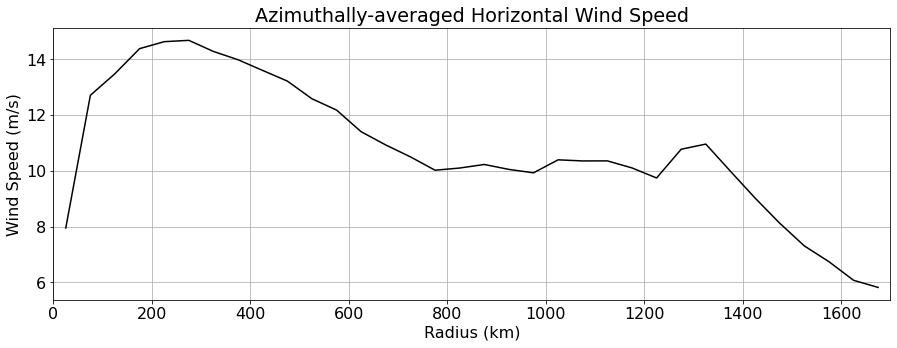

In [9]:
# Define some radial bin (the interval of the bin should be greater than the grid resolution. e.g., if grid resolution is 0.7 deg (~70 km),
# then it does not make sense to setup radial bin interval less than sqrt(2)*70 km
max_radius = np.max(radius[:]) # finding maximum radius
bin_radius = np.arange(0,max_radius+50,50) # radius bins with 100 km interval

# calculate averages of wind speed at a specified radius range
wndspd_radialprof = np.zeros(len(bin_radius)-1)*np.nan
for b in range(0,len(bin_radius)-1):
    bidx_radius = (radius>=bin_radius[b])&(radius<bin_radius[b+1])
    wndspd_radialprof[b]=np.mean(wndspd[bidx_radius])

# plot
bin_radius_ctr = (bin_radius[0:-1]+bin_radius[1:])/2
fig = plt.figure(figsize=(15,5)) # create a figure
plt.rcParams.update({'font.size':16}) # change the font size

ax = plt.axes() 
plot1 = ax.plot(bin_radius_ctr,wndspd_radialprof,color='k')
ax.set_xlim(bin_radius[0],bin_radius[-1])
ax.set_xlabel('Radius (km)')
ax.set_ylabel('Wind Speed (m/s)')
plt.grid(True)

# add title
ax.set_title('Azimuthally-averaged Horizontal Wind Speed') 

/opt/conda/envs/ou-summer-2021/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/opt/conda/envs/ou-summer-2021/lib/python3.7/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Text(0.5, 1.0, 'Horizontal Wind Speed within 0 <= θ < pi/2')

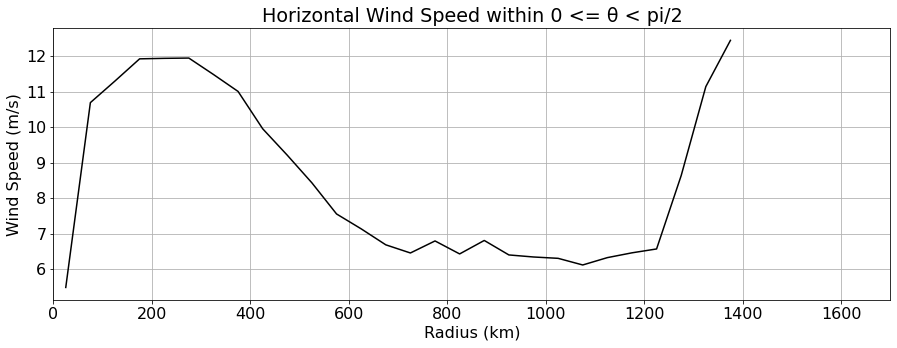

In [10]:
# You can also specify which azimuthal angle to average
max_radius = np.max(radius[:]) # finding maximum radius
bin_radius = np.arange(0,max_radius+50,50) # radius bins with 100 km interval

# define azimuthal angle that you want to average over by finding points where the azimuthal angle is within some specified range (e.g., 0 to pi/2)
bidx_azimuth = (azimuth_angle>=0)&(azimuth_angle<(math.pi/2))
# calculate averages of wind speed at a specified radius range (only within the specified azimuthal angles)
wndspd_radialprof_quadrant = np.zeros(len(bin_radius)-1)*np.nan
for b in range(0,len(bin_radius)-1):
    bidx_radius = (radius>=bin_radius[b])&(radius<bin_radius[b+1])
    wndspd_radialprof_quadrant[b]=np.mean(wndspd[bidx_radius&bidx_azimuth])

# plot
bin_radius_ctr = (bin_radius[0:-1]+bin_radius[1:])/2
fig = plt.figure(figsize=(15,5)) # create a figure
plt.rcParams.update({'font.size':16}) # change the font size

ax = plt.axes() 
plot1 = ax.plot(bin_radius_ctr,wndspd_radialprof_quadrant,color='k')
ax.set_xlim(bin_radius[0],bin_radius[-1])
ax.set_xlabel('Radius (km)')
ax.set_ylabel('Wind Speed (m/s)')
plt.grid(True)

# add title
ax.set_title('Horizontal Wind Speed within 0 <= \u03B8 < pi/2') 